# Simple Linear Regression

### Build a Simple Linear Regression model with Company employee churn dataset where churn out rate is the target variable. Also understand the correaltion and RMSE between the employee salary hike and churn out rate.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

In [2]:
# import dataset
emp = pd.read_csv(r"D:\360digi\DS\Sharath\Simple_linearRegression\handson\Datasets_SLR\emp_data.csv")
emp

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [3]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Salary_hike     10 non-null     int64
 1   Churn_out_rate  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [4]:
emp.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [5]:
# check missing values
emp.isnull().sum()

Salary_hike       0
Churn_out_rate    0
dtype: int64

In [ ]:
# Split the data into Target and Predictors

In [6]:
X = pd.DataFrame(emp['Salary_hike'])

In [7]:
Y = pd.DataFrame(emp['Churn_out_rate'])

In [8]:
# Select numeric features for data preprocessing
numeric_features = ['Salary_hike']
numeric_features

['Salary_hike']

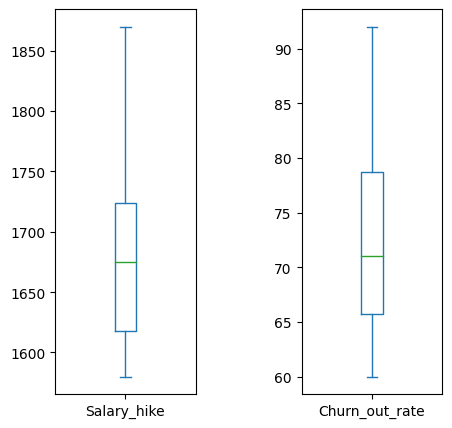

In [9]:
# box plot visualisation
emp.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()
#No outliers

In [ ]:
# Below steps are not necessary for our dataset but creating a pipeline so we can test the algorithm with new dataset easily.

In [10]:
# Winsorization
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = numeric_features)
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['Salary_hike'])

In [11]:
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean'))])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer())])

In [12]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['Salary_hike']))])

In [13]:
preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, numeric_features)])
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 ['Salary_hike'])])


In [14]:
preprocessor1 = ColumnTransformer(transformers = [('wins', outlier_pipeline, numeric_features)])
print(preprocessor1)

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Salary_hike']))]),
                                 ['Salary_hike'])])


In [15]:
impute_data = preprocessor.fit(X)

In [16]:
emp['Salary_hike'] = pd.DataFrame(impute_data.transform(X))

In [17]:
X2 = pd.DataFrame(emp['Salary_hike'])

In [18]:
winz_data = preprocessor1.fit(X2)

In [19]:
emp['Salary_hike'] = pd.DataFrame(winz_data.transform(X))

In [20]:
emp.head(10)

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


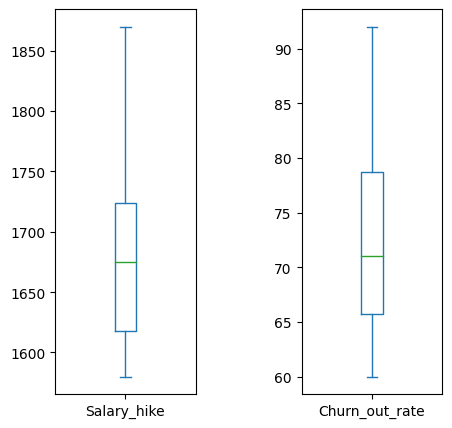

In [21]:
# box plot visualisation
emp.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()
#No outliers

In [22]:
import sweetviz as sv

report = sv.analyze(emp)
report.show_html('EDAreport.html')

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


Report EDAreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# Graphical analysis

<BarContainer object of 10 artists>

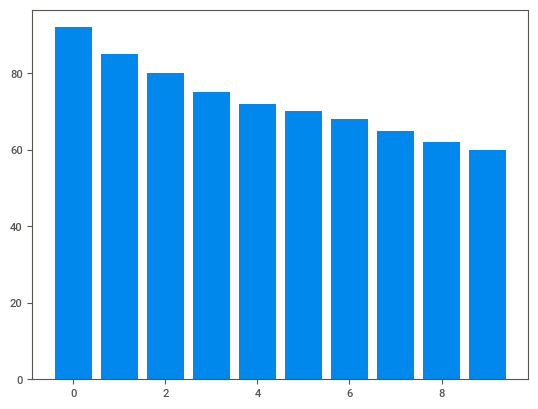

In [23]:
plt.bar(height = emp.Churn_out_rate, x = np.arange(10))


(array([2., 1., 1., 2., 1., 0., 1., 1., 0., 1.]),
 array([60. , 63.2, 66.4, 69.6, 72.8, 76. , 79.2, 82.4, 85.6, 88.8, 92. ]),
 <BarContainer object of 10 artists>)

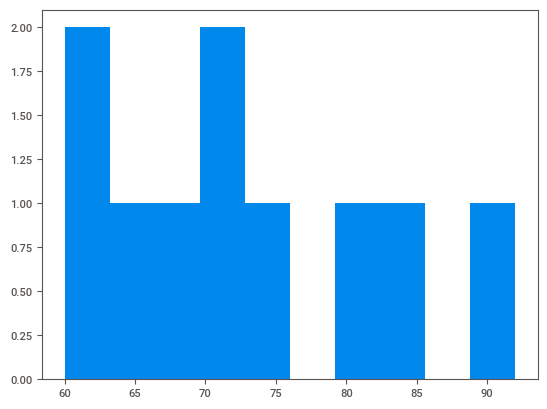

In [24]:
plt.hist(emp.Churn_out_rate) #histogram


<BarContainer object of 10 artists>

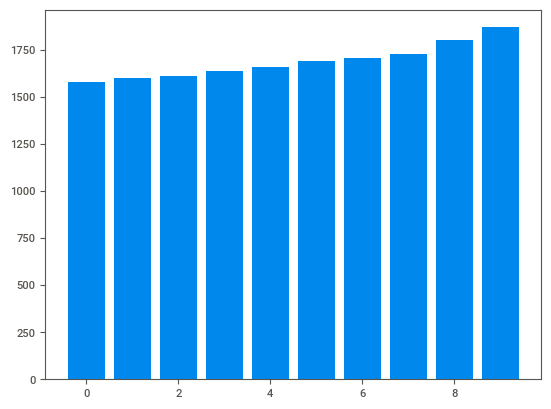

In [25]:
plt.bar(height = emp.Salary_hike, x = np.arange(10))


(array([2., 1., 2., 1., 1., 1., 0., 1., 0., 1.]),
 array([1580., 1609., 1638., 1667., 1696., 1725., 1754., 1783., 1812.,
        1841., 1870.]),
 <BarContainer object of 10 artists>)

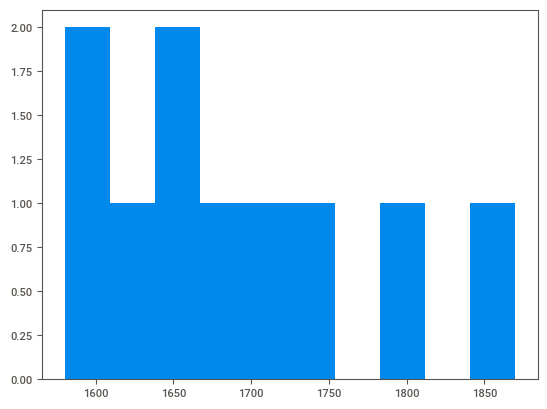

In [26]:
plt.hist(emp.Salary_hike)

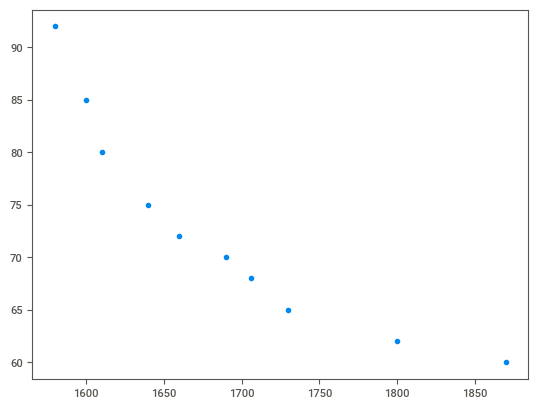

In [27]:
# # Bivariate Analysis
# Scatter plot
plt.scatter(x = emp['Salary_hike'], y = emp['Churn_out_rate']) 

In [28]:
# Shape - exponential
# Direction - negative

In [29]:
# Correlation coefficient
np.corrcoef(emp.Salary_hike, emp.Churn_out_rate)

array([[ 1.        , -0.91172162],
       [-0.91172162,  1.        ]])

In [30]:
# Covariance
cov_output = np.cov(emp.Salary_hike, emp.Churn_out_rate)[0, 1]
cov_output

-861.2666666666667

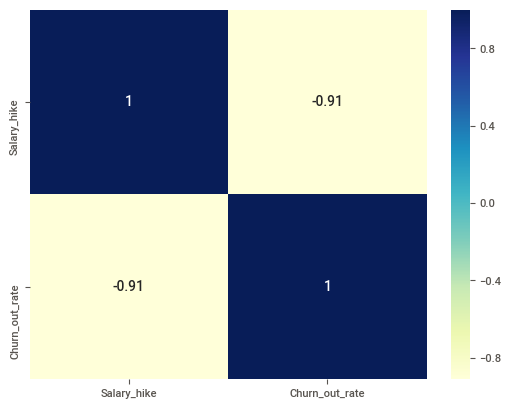

In [31]:
#Heatmap
dataplot = sns.heatmap(emp.corr(), annot = True, cmap = "YlGnBu")

# Regression Techniques

### Simple Linear Regression Y ~ X

In [32]:
model = smf.ols('Churn_out_rate ~ Salary_hike', data = emp).fit()

In [33]:
model.summary()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           0.000239
Time:                        00:53:21   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     244.3649     27.352      8.934      0.000     181.291     307.439
Salary_hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# cal = 244.3649 -0.1015(Salary_hike)
# R-squared : 0.831  where |r| < 0.85 is considered as moderate correlation
# RMSE : 3.9975

In [35]:
pred1 = model.predict(pd.DataFrame(emp['Salary_hike']))

pred1

0    83.927531
1    81.896678
2    80.881252
3    77.834973
4    75.804120
5    72.757840
6    71.133158
7    68.696134
8    61.588149
9    54.480164
dtype: float64

In [36]:
# Error calculation (error = AV - PV)
res1 = emp.Churn_out_rate - pred1

print(np.mean(res1))

8.526512829121202e-15


In [37]:
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

3.997528462337793

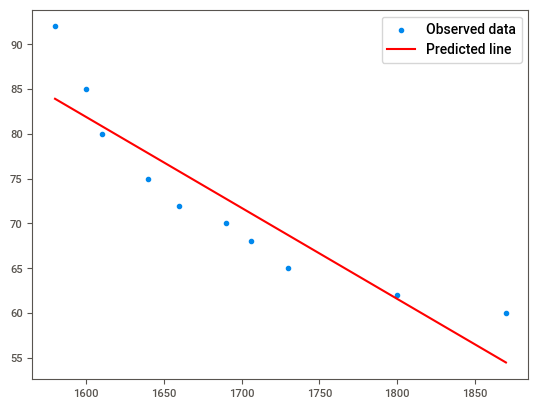

In [38]:
# Regression Line
plt.scatter(emp.Salary_hike, emp.Churn_out_rate)
plt.plot(emp.Salary_hike, pred1, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

# Model Tuning with Transformations

### Log Transformation
### x = log(Salary_hike); y = Churn_out_rate

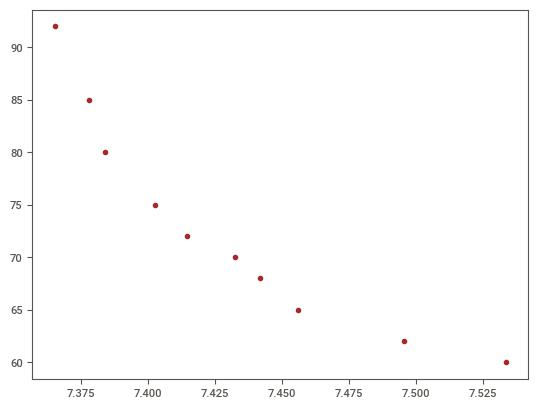

In [39]:
plt.scatter(x = np.log(emp['Salary_hike']), y = emp['Churn_out_rate'], color = 'brown')

In [40]:
#correlation
np.corrcoef(np.log(emp.Salary_hike), emp.Churn_out_rate)

array([[ 1.        , -0.92120773],
       [-0.92120773,  1.        ]])

In [41]:
model2 = smf.ols('Churn_out_rate ~ np.log(Salary_hike)', data = emp).fit()
model2.summary()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           0.000153
Time:                        00:53:30   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(Salary_hike)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# cal = 1381.4562 -176.1097(log(Salary_hike))
# R-squared : 0.849  where |r| > 0.85 is considered as strong correlation
# RMSE : 3.7860

In [43]:
pred2 = model2.predict(pd.DataFrame(emp['Salary_hike']))

In [44]:
# Error calculation
res2 = emp.Churn_out_rate - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

3.7860036130227708

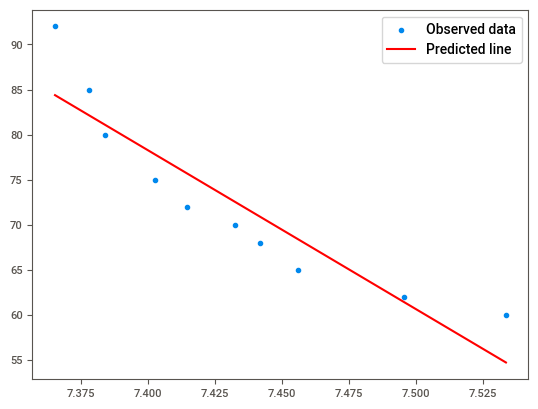

In [45]:
# Regression Line
plt.scatter(np.log(emp.Salary_hike), emp.Churn_out_rate)
plt.plot(np.log(emp.Salary_hike), pred2, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

### Exponential transformation
### x = Salary_hike; y = log(Churn_out_rate)

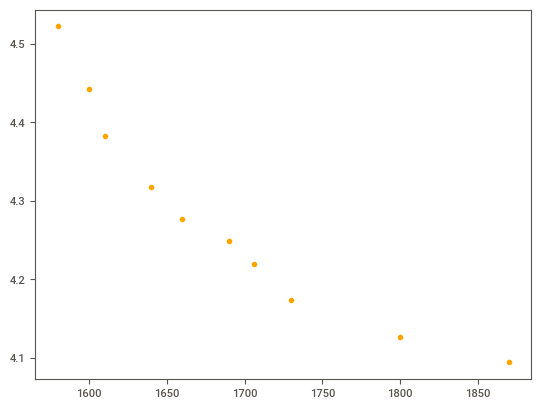

In [46]:
plt.scatter(x = emp['Salary_hike'], y = np.log(emp['Churn_out_rate']), color = 'orange')

In [47]:
#correlation
np.corrcoef(emp.Salary_hike, np.log(emp.Churn_out_rate))

array([[ 1.        , -0.93463607],
       [-0.93463607,  1.        ]])

In [48]:
model3 = smf.ols('np.log(Churn_out_rate) ~ Salary_hike', data = emp).fit()
model3.summary()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.874
Model:                                OLS   Adj. R-squared:                  0.858
Method:                     Least Squares   F-statistic:                     55.26
Date:                    Sat, 25 Feb 2023   Prob (F-statistic):           7.38e-05
Time:                            00:53:37   Log-Likelihood:                 16.511
No. Observations:                      10   AIC:                            -29.02
Df Residuals:                           8   BIC:                            -28.42
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.6383      0.318     20.902      0.000       5.906       7.371
Salary_hike    -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# log(Churn_out_rate) = 6.6383 -0.0014(Salary_hike)
# R-squared : 0.874  where |r| > 0.85 is considered as strong correlation
# RMSE : 3.5415

In [50]:
pred3 = model3.predict(pd.DataFrame(emp['Salary_hike']))

In [51]:
pred3_at = np.exp(pred3)
print(pred3_at)

0    84.107097
1    81.790758
2    80.656622
3    77.347701
4    75.217518
5    72.131736
6    70.538084
7    68.213379
8    61.861455
9    56.101012
dtype: float64


In [52]:
res3 = emp.Churn_out_rate - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

3.5415493188215756

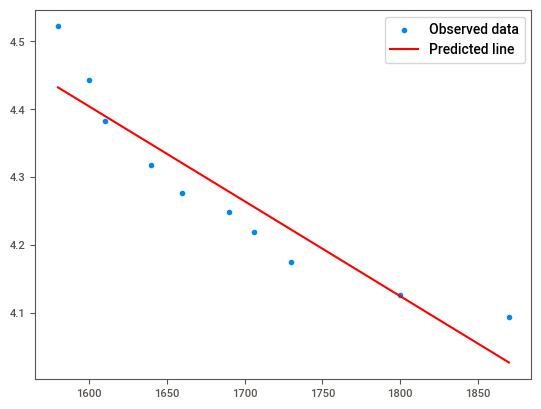

In [53]:
# Regression Line
plt.scatter(emp.Salary_hike, np.log(emp.Churn_out_rate))
plt.plot(emp.Salary_hike, pred3, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

### Polynomial transformation 
### x = Salary_hike; x^2 = Salary_hike*Salary_hike; y = log(Churn_out_rate)
### log(y) ~ x + x^2

In [54]:
X = pd.DataFrame(emp['Salary_hike'])

In [55]:
Y = pd.DataFrame(emp['Churn_out_rate'])

In [56]:
model4 = smf.ols('np.log(Churn_out_rate) ~ Salary_hike + I(Salary_hike*Salary_hike)', data = emp).fit()
model4.summary()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.984
Model:                                OLS   Adj. R-squared:                  0.979
Method:                     Least Squares   F-statistic:                     210.1
Date:                    Sat, 25 Feb 2023   Prob (F-statistic):           5.63e-07
Time:                            00:53:43   Log-Likelihood:                 26.728
No. Observations:                      10   AIC:                            -47.46
Df Residuals:                           7   BIC:                            -46.55
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       23.1762      2.415      9.597      0.000      17.466      28.887
Salary_hike                     -0.0207      0.003     -7.351      0.000      -0.027      -0.014
I(Salary_hike * Salary_hike)  5.605e-06   8.17e-07      6.857      0.000    3.67e-06    7.54e-06
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.506
Skew:                          -0.088   Prob(JB):                        0.777
Kurtosis:                       1.913   Cond. No.                     1.10e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# log(Churn_out_rate) = 23.1762 -0.0207(Salary_hike) + 5.605e-06(Salary_hike*Salary_hike)
# R-squared : 0.984  where |r| > 0.85 is considered as strong correlation
# RMSE : 1.3267

In [58]:
pred4 = model4.predict(pd.DataFrame(emp))
print(pred4)

0    4.493907
1    4.436784
2    4.409904
3    4.335990
4    4.292320
5    4.235222
6    4.208895
7    4.174785
8    4.112180
9    4.104504
dtype: float64


In [59]:
pred4_at = np.exp(pred4)
pred4_at

0    89.470282
1    84.502725
2    82.261561
3    76.400595
4    73.135942
5    69.076991
6    67.282128
7    65.025854
8    61.079708
9    60.612686
dtype: float64

In [60]:
# Error calculation
res4 = emp.Churn_out_rate - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

1.3267899683869546

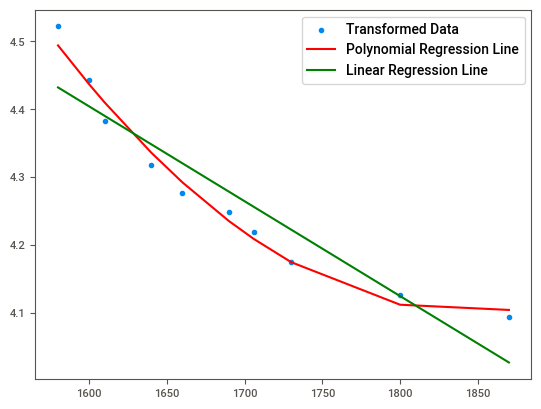

In [61]:
plt.scatter(X['Salary_hike'], np.log(Y['Churn_out_rate']))
plt.plot(X['Salary_hike'], pred4, color = 'red')
plt.plot(X['Salary_hike'], pred3, color = 'green', label = 'linear')
plt.legend(['Transformed Data', 'Polynomial Regression Line', 'Linear Regression Line'])
plt.show()

## Choose the best model using RMSE

In [62]:
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)

In [63]:
table_rmse

,MODEL,RMSE
0,SLR,3.997528
1,Log model,3.786004
2,Exp model,3.541549
3,Poly model,1.326790


In [ ]:
# The model with low RMSE value is the best model. Polynomial Regression is the best model with :
# log(Churn_out_rate) = 23.1762 -0.0207(Salary_hike) + 5.605e-06(Salary_hike*Salary_hike)
# R-squared : 0.984  where |r| > 0.85 is considered as strong correlation
# RMSE : 1.3267